# **Model Building:**

## Importing Necessary Libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv('./data/Spliited_data.csv')
df.head()

,Rooms per dwelling,Median home value
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rooms per dwelling  506 non-null    float64
 1   Median home value   506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


# Splitting Datas into X and Y

In [5]:
X = df.iloc[:,-1].to_frame()
y = df.iloc[:,0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(379, 1) (127, 1) (379,) (127,)


## Scaling X_train and X_test

In [7]:
scaler = StandardScaler()

In [8]:
Scaled_X_train = scaler.fit_transform(X_train)
Scaled_X_test = scaler.transform(X_test)

## Model - Linear Regression

In [9]:
reg = LinearRegression()

In [10]:
reg.fit(Scaled_X_train, y_train)

LinearRegression()

In [13]:
print(reg.coef_)

[0.5109543]


In [14]:
print(reg.intercept_)

6.323496042216359


## Prediciton

In [18]:
y_pred = reg.predict(Scaled_X_test)
y_pred

array([6.36104726, 6.83851898, 5.81846577, 6.31764074, 5.95411114,
       6.16571793, 6.04635   , 5.84016903, 6.14401467, 5.99209185,
       6.24710515, 6.10603396, 5.46036198, 6.2308277 , 6.0843307 ,
       6.69744779, 6.10060815, 5.63398806, 7.7934624 , 5.84559484,
       6.4478603 , 6.65946708, 5.76963344, 6.29593748, 5.85102066,
       5.8293174 , 6.18199537, 5.88900136, 6.25795678, 6.07347907,
       6.33391819, 6.37189889, 5.89442718, 6.20912444, 6.11688559,
       6.13316304, 6.96331272, 6.13858885, 6.40445378, 6.35019563,
       6.14944048, 6.61063475, 7.7934624 , 6.02464674, 6.30678911,
       5.89985299, 5.7913367 , 6.39360215, 6.16029211, 6.38275052,
       6.10603396, 7.00129342, 5.90527881, 6.5183959 , 7.44078443,
       6.2308277 , 6.07890489, 6.62691219, 6.37732471, 6.0843307 ,
       6.43700867, 7.00129342, 6.78968664, 6.17656956, 6.38817634,
       6.16571793, 5.7913367 , 6.42615704, 6.75170594, 5.76963344,
       6.16571793, 6.36647308, 5.66654295, 6.19827281, 6.20912

Text(0, 0.5, 'Predicted Values')

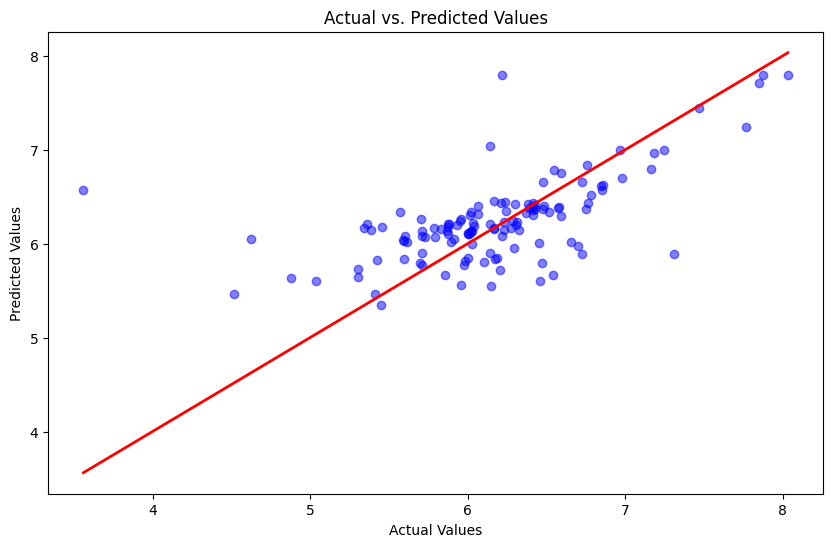

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [25]:
residuals = y_test - y_pred

Text(0, 0.5, 'Residuals')

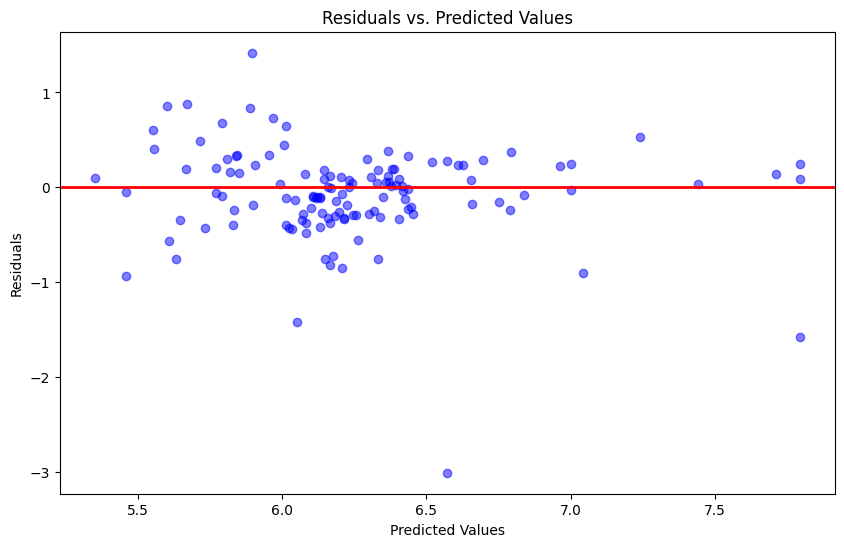

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linewidth=2)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Frequency')

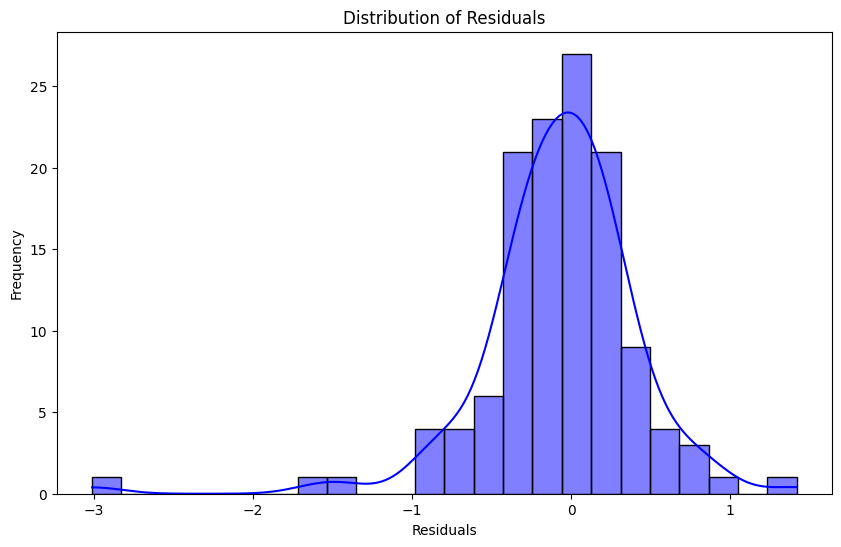

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

## Model Evaluation

In [37]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE:', mse)
print('RMSE:', rmse)

MSE: 0.25143781326513237
RMSE: 0.5014357518816667


In [38]:
mae = mean_absolute_error(y_test, y_pred)

print('MAE:', mae)

MAE: 0.3326837633162111


In [41]:
score = r2_score(y_test, y_pred)
adj_score = 1 - (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)

print('R2 Score:', score)
print('Ajusted R2 Score:', adj_score)

R2 Score: 0.37413100852503856
Ajusted R2 Score: 0.3691240565932389


<Axes: xlabel='Rooms per dwelling'>

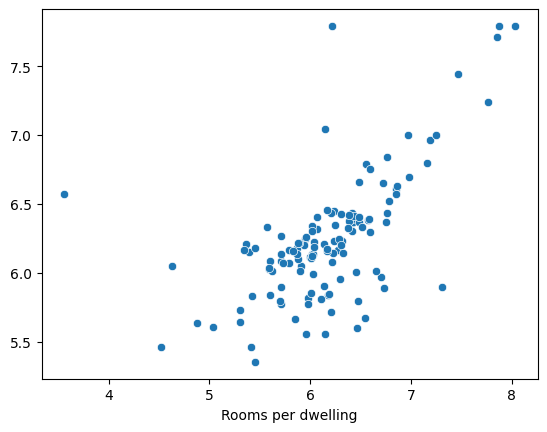

In [45]:
sns.scatterplot(x = y_test, y = y_pred)

<Axes: xlabel='Rooms per dwelling'>

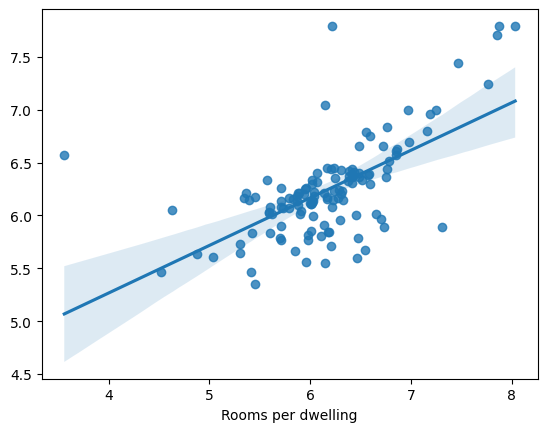

In [47]:
sns.regplot(x = y_test, y = y_pred)

## Observation:
1. MSE: 0.25143781326513237
2. RMSE: 0.5014357518816667
3. MAE: 0.3326837633162111
4. R2 Score: 0.37413100852503856
5. Ajusted R2 Score: 0.3691240565932389

- The R² score and adjusted R² score suggest that the model explains a moderate portion of the variance.
- The MAE and RMSE indicate how far your predictions are from the actual values on average